# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

# 02. Import Data

In [2]:
# Display charts in notebook
%matplotlib inline

In [3]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Achievement 6'

In [4]:
# Import trips_wrangled_no_outliers2.csv
df_trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'CitiBike_PATH_distance.csv'), index_col = False)

# 03. Explore Data

In [5]:
# View first 5 rows for df_trips
df_trips.head()

,Start Station Name,Distance from nearest PATH station via Bicycle,Newark,Grove Street,Hoboken,Harrison,Exchange Place,Journal Square,Newport,starttime_counts
0,5 Corners Library,0.6,7.1,1.4,2.7,7.1,2.0,0.6,1.8,1912
1,Astor Place,1.1,6.4,2.0,3.6,6.3,2.3,1.1,2.9,4038
2,Baldwin at Montgomery,0.8,6.5,1.4,3.0,6.5,1.7,0.8,2.1,5603
3,Bergen Ave,0.9,6.3,1.9,3.5,6.2,2.2,0.9,2.6,3899
4,Brunswick & 6th,0.9,7.6,0.9,2.0,7.6,1.7,1.2,1.1,6340


In [6]:
# View df_trips rows and columns count
df_trips.shape

(51, 10)

In [7]:
# View df_trips columns datatypes
df_trips.dtypes

Start Station Name                                 object
Distance from nearest PATH station via Bicycle    float64
Newark                                            float64
Grove Street                                      float64
Hoboken                                           float64
Harrison                                          float64
Exchange Place                                    float64
Journal Square                                    float64
Newport                                           float64
starttime_counts                                    int64
dtype: object

In [8]:
# Create dataframe for clustering
df_trips_cluster = df_trips[['Distance from nearest PATH station via Bicycle', 'starttime_counts']]

In [9]:
# Standardize data
scaler = StandardScaler()
df_std = scaler.fit_transform(df_trips_cluster)

# 04. Elbow Technique

In [10]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [11]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))] 

score

[-102.0,
 -51.87706975094794,
 -27.92489471729149,
 -20.37653016238969,
 -15.407746729293175,
 -11.534430924906797,
 -8.806046765307618,
 -7.313712435306411,
 -6.129968555001446]

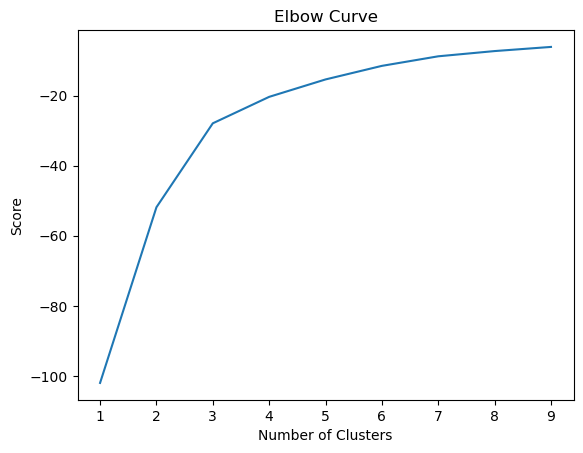

In [12]:
# Plot elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Observations: It appears that the 'elbow point' occurs at 3, so there will be 3 clusters in the k-means algorithm.

# 05. k-means Clustering

In [13]:
# Create k-means object.
kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.
kmeans.fit(df_std)

KMeans(n_clusters=3)

In [15]:
# Create column with values corresponding to cluster in which observation belongs
df_trips_cluster['clusters'] = kmeans.fit_predict(df_std)

In [16]:
# Ensure 'clusters' column was successfully created
df_trips_cluster.head()

,Distance from nearest PATH station via Bicycle,starttime_counts,clusters
0,0.6,1912,0
1,1.1,4038,1
2,0.8,5603,0
3,0.9,3899,0
4,0.9,6340,0


#### Observations: New column successfully created.

In [17]:
# View counts for clusters
df_trips_cluster['clusters'].value_counts()

0    27
1    14
2    10
Name: clusters, dtype: int64

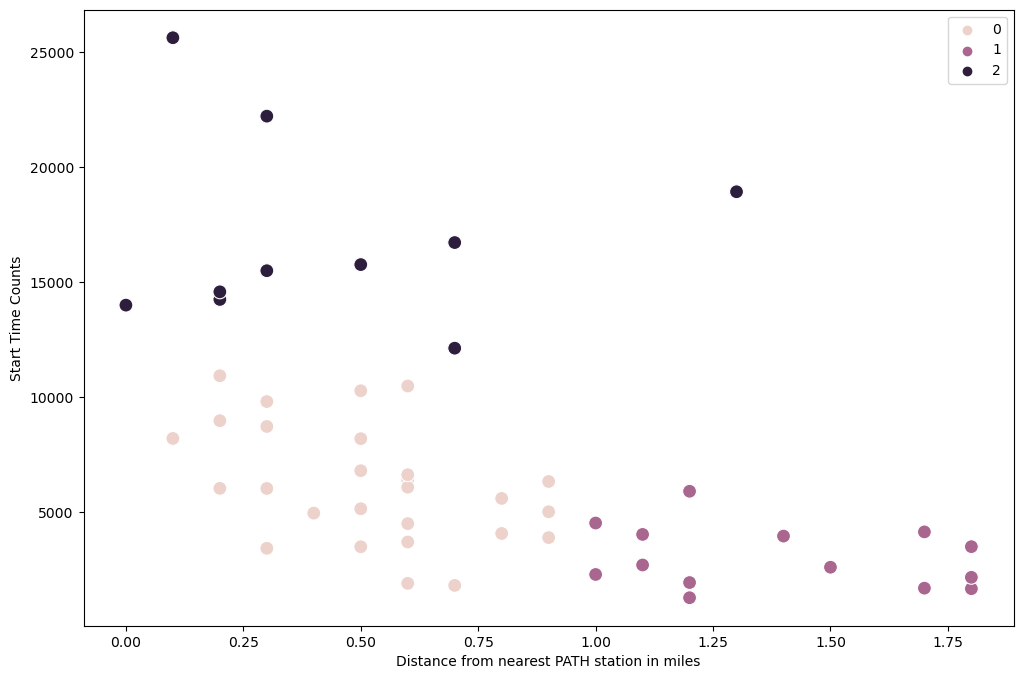

In [18]:
# Plot clusters for 'Distance from nearest PATH station via Bicycle' and 'starttime_counts' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trips_cluster['Distance from nearest PATH station via Bicycle'], y=df_trips_cluster['starttime_counts'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Distance from nearest PATH station in miles') 
plt.ylabel('Start Time Counts') 
plt.show()

#### Observations: The '0' cluster represents start time counts for Citi Bike stations 1 mile or more from the nearest PATH station. The '1' cluster represents stations with start time counts approximately 10,000 or less and are mostly between 0.2 and 0.9 miles away from the nearest PATH station. The '2' cluster represents stations with start time counts above 10,000 and are located less than 0.75 miles away from the nearest PATH station. 

In [19]:
# Create column for cluster color
df_trips_cluster.loc[df_trips_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_trips_cluster.loc[df_trips_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_trips_cluster.loc[df_trips_cluster['clusters'] == 0, 'cluster'] = 'light pink'


In [20]:
# Calculate descriptive statistics for clusters
df_trips_cluster.groupby('cluster').agg({'Distance from nearest PATH station via Bicycle':['mean', 'median'], 
                         'starttime_counts':['mean', 'median']})

Distance from nearest PATH station via Bicycle         \
                                                      mean median   
cluster                                                             
dark purple                                       0.430000    0.3   
light pink                                        0.518519    0.5   
purple                                            1.392857    1.3   

            starttime_counts           
                        mean   median  
cluster                                
dark purple     16974.900000  15634.0  
light pink       6207.518519   6040.0  
purple           3036.285714   2660.5

#### Observations: 
#### An understanding of customer age combined with start times and/or trip duration could give insight regarding what the bikes are being used for such as students traveling for school, adults traveling for work, or customers taking trips for recreation. 
#### The median times for beginning a trip are 8:00am and 5:00pm, so it could be valuable to combine that information with station popularity to plan for how many bikes should be available and where they are most needed. 

# 06. Export Data

In [21]:
# Export df_trips_cluster as clustering.csv
df_trips_cluster.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clustering.csv'), index = False)